In [2]:
#import dependencies
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



In [3]:
#load csv files
csv_path1="raw_data/clinicaltrial_data.csv"
csv_path2="raw_data/mouse_drug_data.csv"

#read csv files
path1=pd.read_csv(csv_path1)
path2=pd.read_csv(csv_path2)

#incorporate files into dataframes
clinical_trial=pd.DataFrame(path1)
mouse_drug=pd.DataFrame(path2)

#clinical_trial.head()
#mouse_drug.head()

#merge datasets
combined_data=pd.merge(clinical_trial,mouse_drug,how="outer",on="Mouse ID")
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [94]:
#Tumor Response to Treatment
#group by drug and timepoint to get tumor volume and timepoint for average tumor volume
#Drug_Combined=combined_data.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
Drug_Combined=combined_data.groupby(["Drug","Timepoint"]).mean()
Drug_combined_sd = combined_data.groupby(["Drug","Timepoint"]).agg(np.std,ddof=0)
Drug_combined_sd = pd.DataFrame(Drug_combined_sd)
Drug_combined_sd = pd.DataFrame(Drug_combined_sd["Tumor Volume (mm3)"])
Drug_combined_sd

#Drug_Combined =pd.DataFrame(Drug_Combined)
Drug_Combined = pd.DataFrame(Drug_Combined["Tumor Volume (mm3)"])
Drug_Combined.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [97]:
#create a table comparing the average tumor volume for the drugs by the timepoint.
unstack_drug =Drug_Combined.unstack("Drug")
unstack_drug





Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [95]:
#unstack table for SE values

SE_tumor_volume_unstack = Drug_combined_sd.unstack("Drug")
SE_tumor_volume_unstack

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   2.197647  0.735688  1.151761  1.242109  0.949271   
10                  3.442436  1.029330  1.262689  1.637910  1.428468   
15                  4.021867  1.408781  1.599705  2.461868  1.987318   
20                  4.267015  1.482184  2.075749  3.082210  2.594679   
25                  4.040192  1.811512  2.269005  3.204945  3.354998   
30                  4.282231  1.900164  2.524244  3.851479  3.649973   
35                  4.821974  2.495934  3.264073  4.511469  3.793175   
40                  5.472143  2.554552  3.165659  4.334519  4.185296   
45                  5.473794  3.125859  3.236929  4.595379  4.906426   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          1.045927  1.135133  2.365989  1.175081  0.906174  
10         1.928230  1.764510  3.454076  2.034132  1.209568  
15         2.678375  1.864437  3.694863  2.313599  1.657125  
20         3.562160  2.220724  3.687602  2.781171  2.132729  
25         4.139488  2.081850  3.503701  3.147711  2.333522  
30         4.558204  2.584374  4.056767  3.708932  2.993486  
35         4.642077  3.254788  4.326493  3.885324  3.178026  
40         4.545879  4.425864  4.918779  4.677884  3.600198  
45         4.274532  4.626071  5.347519  4.985508  3.618444

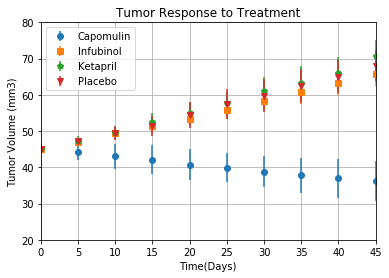

In [114]:
#create scatter plot for Tumor volume  to Treatment
#x_axis=np.arange(0,50,5)

#plot error bar
plt.errorbar(unstack_drug.index,unstack_drug["Tumor Volume (mm3)","Capomulin"],
             SE_tumor_volume_unstack["Tumor Volume (mm3)","Capomulin"],label= "Capomulin",fmt="o")

plt.errorbar(unstack_drug.index, unstack_drug["Tumor Volume (mm3)","Infubinol"],
            SE_tumor_volume_unstack["Tumor Volume (mm3)","Infubinol"],label="Infubinol",fmt="s")
plt.errorbar(unstack_drug.index, unstack_drug["Tumor Volume (mm3)","Ketapril"],
            SE_tumor_volume_unstack["Tumor Volume (mm3)", "Ketapril"], label = "Ketapril", fmt = "p")

plt.errorbar(unstack_drug.index, unstack_drug["Tumor Volume (mm3)", "Placebo"],
            SE_tumor_volume_unstack["Tumor Volume (mm3)", "Placebo"], label="Placebo", fmt="v")


plt.ylim(20,80)
plt.xlim(0,45)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="upper left")
plt.show()


In [39]:
#Metastic Response to Treatment
Met_combined=combined_data.groupby(["Drug","Timepoint"]).mean()
Met_combined = pd.DataFrame(Met_combined["Metastatic Sites"])

#create a table comparing the average metastic sites for the drugs by the timepoint.
unstack_met=Met_combined.unstack("Drug")
unstack_met

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [130]:
#dataframe for standard error for Metastic Sites by drug
Met_combined_se = combined_data.groupby(["Drug","Timepoint"]).agg(np.std,ddof=1)
Met_combined_se = pd.DataFrame(Met_combined_se)
Met_combined_se =pd.DataFrame(Met_combined_se["Metastatic Sites"])

#unstack
SE_Met_unstack = Met_combined_se.unstack("Drug")
SE_Met_unstack

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.374166  0.497613  0.458258  0.470472  0.448978  0.494535   
10                0.627163  0.680557  0.730297  0.666125  0.749603  0.564660   
15                0.646899  0.787327  0.889087  0.834210  0.727029  0.850696   
20                0.775107  1.022620  1.050063  1.031662  0.812728  1.020263   
25                0.852803  1.098127  1.127494  1.256562  0.785905  1.088037   
30                0.811177  0.997914  0.939336  1.474179  1.032796  1.162919   
35                0.795006  0.997249  0.778499  1.490164  1.279881  1.277446   
40                0.804748  1.081818  0.994429  1.222799  1.245946  1.029857   
45                0.928388  1.031553  0.927961  0.924416  1.265924  1.009050   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.476095  0.331662  0.435890  0.380693  
10         0.506870  0.442326  0.593109  0.511766  
15         0.562296  0.564660  0.735868  0.511766  
20         0.707107  0.572768  0.920662  0.685994  
25         0.744946  0.572768  0.958190  0.946485  
30         0.960769  0.671262  0.978528  0.961150  
35         1.159502  0.669043  0.963933  1.069045  
40         1.301708  0.718185  1.083625  1.121714  
45         1.133893  0.850696  1.190874  1.071612

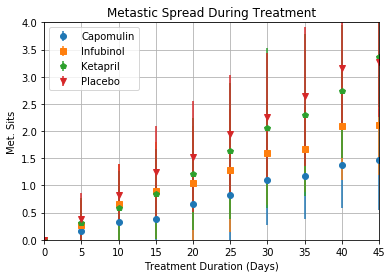

In [133]:
#plot scatter plot
plt.errorbar(unstack_met.index,unstack_met["Metastatic Sites","Capomulin"],
            SE_Met_unstack["Metastatic Sites","Capomulin"], label="Capomulin", fmt="o")
plt.errorbar(unstack_met.index,unstack_met["Metastatic Sites","Infubinol"],
            SE_Met_unstack["Metastatic Sites","Infubinol"], label="Infubinol", fmt="s")
plt.errorbar(unstack_met.index,unstack_met["Metastatic Sites","Ketapril"],
            SE_Met_unstack["Metastatic Sites","Ketapril"], label="Ketapril", fmt="p")
plt.errorbar(unstack_met.index,unstack_met["Metastatic Sites","Placebo"],
            SE_Met_unstack["Metastatic Sites","Placebo"], label="Placebo", fmt="v")

# plt.scatter(unstack_met.index, unstack_met["Metastatic Sites","Capomulin"])
# plt.scatter(unstack_met.index,unstack_met["Metastatic Sites", "Infubinol"])
# plt.scatter(unstack_met.index, unstack_met["Metastatic Sites", "Ketapril"])
# plt.scatter(unstack_met.index, unstack_met["Metastatic Sites", "Placebo"])
plt.xlim(0,45)
plt.ylim(0,4,0.5)
plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sits")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [45]:
#Survival Rates
life_count=combined_data.groupby(["Drug","Timepoint"]).count()
life_count = pd.DataFrame(life_count["Mouse ID"])
life_count= life_count.rename(columns={"Mouse ID":"Mouse Count"})
life_count
#unstacking
unstack_life_count = life_count.unstack("Drug")
unstack_life_count = unstack_life_count/25*100
unstack_life_count

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0               100.0    100.0     100.0    100.0    100.0   100.0    104.0   
5               100.0     84.0     100.0     92.0     92.0    96.0    100.0   
10              100.0     80.0      84.0     88.0     84.0    96.0     92.0   
15               96.0     76.0      84.0     76.0     84.0    80.0     68.0   
20               92.0     72.0      80.0     76.0     80.0    76.0     68.0   
25               88.0     72.0      72.0     76.0     72.0    68.0     56.0   
30               88.0     64.0      68.0     72.0     60.0    60.0     52.0   
35               88.0     56.0      48.0     68.0     60.0    56.0     40.0   
40               84.0     56.0      40.0     60.0     60.0    48.0     36.0   
45               84.0     52.0      36.0     44.0     52.0    44.0     28.0   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0            100.0    104.0     100.0  
5            100.0    100.0      96.0  
10            96.0     92.0      88.0  
15            96.0     92.0      84.0  
20            92.0     84.0      68.0  
25            92.0     76.0      64.0  
30            92.0     72.0      60.0  
35            84.0     64.0      56.0  
40            80.0     48.0      56.0  
45            80.0     44.0      56.0

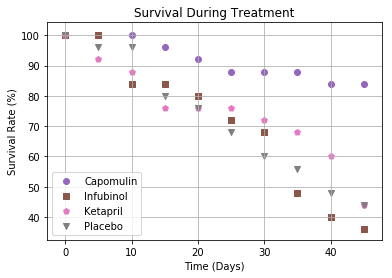

In [140]:
#plot on scatter plot
plt.scatter(unstack_life_count.index, unstack_life_count["Mouse Count","Capomulin"],label="Capomulin",marker="o")
plt.scatter(unstack_life_count.index, unstack_life_count["Mouse Count","Infubinol"],label="Infubinol",marker="s")
plt.scatter(unstack_life_count.index, unstack_life_count["Mouse Count", "Ketapril"],label="Ketapril", marker="p")
plt.scatter(unstack_life_count.index, unstack_life_count["Mouse Count", "Placebo"],label="Placebo",marker="v")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend()
plt.show()

In [84]:
#find difference in tumor volume throughout the days
unstack_drug_diff = (unstack_drug.iloc[9]- unstack_drug.iloc[0]) /45*100
unstack_drug_diff


                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

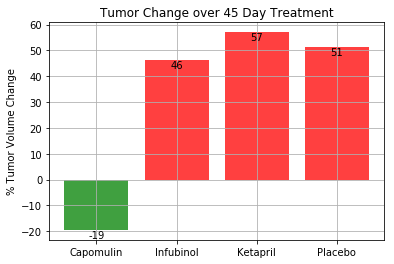

In [166]:
drugs=["Capomulin", "Infubinol","Ketapril","Placebo"]
colors=["green","red","red","red"]
results=[unstack_drug_diff[0],unstack_drug_diff[2],unstack_drug_diff[3],unstack_drug_diff[5]]
tick_locations=[]

x_axis=np.arange(0,len(drugs))
for x in x_axis:
    tick_locations.append(x+0.4)

plt.bar(x_axis, results, color=colors,alpha=0.75,align="edge")
plt.xticks(tick_locations, drugs)
for x,y in zip(x_axis,results):
    plt.text(x+0.4,y+0.05,"%.f" %y,ha='center',va="top")
    
plt.grid()
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.show()